Populating the interactive namespace from numpy and matplotlib
[  8.18794045e+12   9.24797338e+12   1.16425087e+13   1.46570501e+13
   1.84521328e+13   2.32298589e+13   2.92446596e+13   3.68168452e+13
   4.63496620e+13   5.83507673e+13   7.34592637e+13   9.24797338e+13
   1.16425087e+14   1.46570501e+14   1.84521328e+14   2.32298589e+14
   2.92446596e+14   3.68168452e+14   4.63496620e+14   5.83507673e+14
   7.34592637e+14   9.24797338e+14   1.03080063e+15] [  0.41643534   0.43377718   0.46990521   0.50904223   0.55143887
   0.59736659   0.64711951   0.70101619   0.75940178   0.82265012
   0.89116624   0.96538886   1.04579327   1.13289432   1.22724977
   1.32946381   1.44019095   1.56014023   1.69007973   1.83084152
   1.98332694   2.14851243   2.32745572   2.52130269   2.73129459
   2.95877611   3.2052039    3.47215593   3.76134162   4.07461273
   4.41397528   4.78160234   5.17984797   5.61126232   6.07860791
   6.58487734   7.13331246   7.72742514   8.37101972   9.06821741
   9.823482

/Users/nab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:154: RuntimeWarning: invalid value encountered in divide


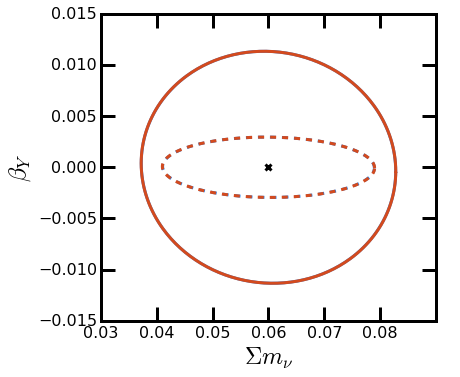

In [19]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import orphics.tools.io as io
import sys, time
from ConfigParser import SafeConfigParser
import csv 

home = '/Users/nab/Desktop/Projects/SO_forecasts/'

exprmnt = 'S45m'
cosmologyName = 'LACosmology'

dlnm = 0.1
dlnq = 0.08
#mbin_mid = np.arange(13.5, 15.71, dlnm)
#qbin_mid = np.arange(np.log(5),np.log(500),dlnq)

#mbin = (np.append(mbin_mid,mbin_mid[-1:]+dlnm)) -dlnm/2
#qbin = (np.append(qbin_mid,qbin_mid[-1:]+dlnq)) -dlnq/2

mbin = np.arange(13.5, 15.71, dlnm)
qbin = np.arange(np.log(5),np.log(500),dlnq)

#mbin = (np.append(mbin_mid,mbin_mid[-1:]+dlnm)) -dlnm/2
#qbin = (np.append(qbin_mid,qbin_mid[-1:]+dlnq)) -dlnq/2


#print qbin

zbin = 0.05
#dm = np.diff(10**mbin)
#dq = np.diff(np.exp(qbin))

dm = np.gradient(10**mbin)
dq = np.gradient(np.exp(qbin))


print dm, dq

#params = ['omch2','ombh2','H0','ns','As','w0','b_ym','alpha_ym','Ysig','gamma_ym','beta_ym']
#params = ['omch2','ombh2','H0','ns','As','mnu','b_ym','alpha_ym','Ysig','gamma_ym']
params = ['H0','ombh2','omch2','As','ns','mnu','b_ym','alpha_ym','Ysig','gamma_ym','beta_ym']
nuisparam = 5

PlnkFile = home+'PlanckFisherMat/Feb1_FisherMat_Planck_tau0.01_lens_fsky0.6.csv'
#DESIFile = home+'PlanckFisherMat/Fisher_BAO_Desi.csv'

PlnkFish = np.loadtxt(PlnkFile)
#DESIFish = np.loadtxt(DESIFile,delimiter=',')

#print DESIFish

#PlnkFile = home+'PlanckFisherMat/Feb1_FisherMat_Planck_tau0.06.csv'
DESIFile = home+'PlanckFisherMat/BAO_highAcc_DESI_Fisher.csv'

#PlnkFish = np.loadtxt(PlnkFile,delimiter=',')
DESIFish = np.loadtxt(DESIFile,delimiter=',')

#print PlnkFish
#print DESIFish

P_Fish = PlnkFish
PD_Fish = PlnkFish + DESIFish

#print PD_Fish

initial_Pchi2 = np.linalg.inv(P_Fish)
initial_PDchi2 = np.linalg.inv(PD_Fish)
print "init mnu", np.sqrt(initial_Pchi2[-1:,-1:])
print "init mnu", np.sqrt(initial_PDchi2[-1:,-1:])

zadd1 = np.zeros([len(PD_Fish[:,0]),nuisparam])
zadd2 = np.zeros([nuisparam,len(PD_Fish[:,0])+nuisparam])
#print zadd1,zadd2

tempfish = np.column_stack((P_Fish,zadd1))
tempfish2 = np.row_stack((tempfish,zadd2))

P_Fish = tempfish2

tempfish = np.column_stack((PD_Fish,zadd1))
tempfish2 = np.row_stack((tempfish,zadd2))

PD_Fish = tempfish2

#print PD_Fish
#inds2add = (np.arange(nuisparam)+len(PD_Fish[:,0]))
#np.insert(PD_Fish,inds2add,0,axis=0)

#print PD_Fish

fishmatcnts = np.ones([len(params),len(params)])

#print fishmatcnts

iniFile = "/Users/nab/Repos/SZ_filter/input/params.ini"
Config = SafeConfigParser()
Config.optionxform=str
Config.read(iniFile)

cosmologyName = 'LACosmology' # from ini file                                                                                                                                     
cosmoListDict = io.dictOfListsFromSection(Config,cosmologyName)
fskyfull = Config.getfloat(exprmnt,'fsky')
#fskyfull = 0.3
fsky = 1400./42000.
#fsky = 0.5

print np.shape(mbin)
print np.shape(qbin), fsky, zbin

#bins are M,z,q

#mat0 = np.load(home+'dN_dzmq'+exprmnt+'.npy') 
#mat0 *=fsky*zbin

mat0 = np.load(home+'dN_dzmq'+exprmnt+cosmologyName+'.npy') 
mat0 *=fsky*zbin

print np.shape(mat0)

for ii in xrange(len(dm)):
    for jj in xrange(len(dq)):
        mat0[ii,:,jj] *= dm[ii]*dq[jj] 
        #mat02[ii,:,jj] *= dm[ii]*dq[jj] 
        
print "Number of clusters", np.sum(mat0)#,np.sum(mat02)

for i in xrange (len(params)):
    for j in xrange(i,len(params)): 
        delparam = cosmoListDict[params[i]][1]
        #print params[i], cosmoListDict[params[i]][0], delparam
        matup = np.load(home+'derivs/dN_dzmq'+exprmnt+cosmologyName+'_'+params[i]+'_up.npy')
        matdn = np.load(home+'derivs/dN_dzmq'+exprmnt+cosmologyName+'_'+params[i]+'_dn.npy')
        delparam2 = cosmoListDict[params[j]][1]
        #print params[j], cosmoListDict[params[j]][0], delparam2
        matup2 = np.load(home+'derivs/dN_dzmq'+exprmnt+cosmologyName+'_'+params[j]+'_up.npy')
        matdn2 = np.load(home+'derivs/dN_dzmq'+exprmnt+cosmologyName+'_'+params[j]+'_dn.npy') 
        
        matup *=fsky*zbin
        matdn *= fsky*zbin
        matup2 *=fsky*zbin
        matdn2 *= fsky*zbin
        
        for ii in xrange(len(dm)):
            for jj in xrange(len(dq)):
                matup[ii,:,jj] *= dm[ii]*dq[jj] 
                matdn[ii,:,jj] *= dm[ii]*dq[jj] 
                matup2[ii,:,jj] *= dm[ii]*dq[jj] 
                matdn2[ii,:,jj] *= dm[ii]*dq[jj] 
        print np.sum(matup)         
        deriv = (matup - matdn)/delparam
        deriv2 = (matup2 - matdn2)/delparam2
        fishmatcnts[i,j] = np.nansum(deriv*deriv2/mat0)
        if (i != j):
            fishmatcnts[j,i] = fishmatcnts[i,j]
    #fishmatcnts[:,i] *= deriv
    #print cosmoListDict[params[i]][0],np.sqrt(1./np.nansum(deriv**2 / mat0))

#matup2 = np.load(home+'derivs/dN_dzmq'+exprmnt+cosmobase+'_'+params[i]+'_up.dat.npy') 
#matdn2 = np.load(home+'derivs/dN_dzmq'+exprmnt+cosmobase+'_'+params[i]+'_dn.dat.npy') 

#chi2 = np.linalg.inv(fishmatcnts)

fishmatcnts = np.insert(fishmatcnts,3,0,axis=0)
fishmatcnts = np.insert(fishmatcnts,3,0,axis=1)

fishmatcntsfull = fishmatcnts * fskyfull/fsky
fishmatcntsfull = fishmatcnts * fskyfull/fsky

#print fishmatcnts

fish_totP = fishmatcnts+P_Fish
fish_totPD = fishmatcnts+PD_Fish

chi2P = np.linalg.inv(fish_totP)
chi2PD = np.linalg.inv(fish_totPD)

fish_totPfull = fishmatcntsfull+P_Fish
fish_totPDfull = fishmatcntsfull+PD_Fish

chi2Pfull = np.linalg.inv(fish_totPfull)
chi2PDfull = np.linalg.inv(fish_totPDfull)

#print chi2P

xval = np.zeros(len(params))
yval = xval

for i in xrange (len(params)):
    ii = i
    if (i>=3):
        ii = i+1
    print params[i], cosmoListDict[params[i]][0],np.sqrt(chi2P[ii,ii]),np.sqrt(chi2PD[ii,ii])
    yval[i] = cosmoListDict[params[i]][0]
    xval[i] = cosmoListDict[params[i]][0]

xval = np.insert(yval,3,0.06)
yval = np.insert(yval,3,0.06)

thk = 3
xx = np.array(np.arange(360) / 180. * np.pi)
circl = np.array([np.cos(xx),np.sin(xx)])

paramlabel = np.insert(params,3,"tau")

paramlabely = r'$\beta_Y$'
paramlabelx = r'$\Sigma m_{\nu}$'

rc('axes', linewidth=thk)
rc('axes', labelcolor='k')
figure(figsize=(6,5.5))
i = 6
j = 11
count = 1+(j-1)*(len(xval)-1) + i
chi22 = np.array([[chi2PD[i,i],chi2PD[i,j]],[chi2PD[j,i],chi2PD[j,j]]])
chi2 = np.array([[chi2P[i,i],chi2P[i,j]],[chi2P[j,i],chi2P[j,j]]])

chi22full = np.array([[chi2PDfull[i,i],chi2PDfull[i,j]],[chi2PDfull[j,i],chi2PDfull[j,j]]])
chi2full = np.array([[chi2Pfull[i,i],chi2Pfull[i,j]],[chi2Pfull[j,i],chi2Pfull[j,j]]])

Lmat = np.linalg.cholesky(chi2)
ansout = np.dot(Lmat,circl)
ansout2 = np.dot(2.0*Lmat,circl)
        
Lmat2 = np.linalg.cholesky(chi22)
ansout_2 = np.dot(Lmat2,circl)
ansout2_2 = np.dot(2.0*Lmat2,circl)
        
Lmatf = np.linalg.cholesky(chi2full)
ansoutf = np.dot(Lmatf,circl)
ansout2f = np.dot(2.0*Lmatf,circl)
        
Lmat2f = np.linalg.cholesky(chi22full)
ansout_2f = np.dot(Lmat2f,circl)
ansout2_2f = np.dot(2.0*Lmat2f,circl)

#plt.subplot(numpars-1,numpars-1,count)
plt.tick_params(size=14,width=thk,labelsize = 16)
#plt.ylabel(r"Efficiency of Energy Injection [% error]",fontsize=16,weight='bold')
#plt.xlabel(r"Amplitude of Non-Thermal Pressure Support [% error]",fontsize=16,weight='bold')
plt.ylabel(paramlabely,fontsize=24,weight='bold')
plt.xlabel(paramlabelx,fontsize=24,weight='bold')
plt.plot(xval[i],yval[j],'xk',mew=thk)
#plt.plot(ansout2_2[0,:]/xval[i]*100. , ansout2_2[1,:]/yval[j]*100.,'#2D7EDF',linewidth=thk,label=r"AdvACTcl + Planck + DESI")
#plt.plot(ansout_2[0,:]/xval[i]*100. , ansout_2[1,:]/yval[j]*100.,color='#2D7EDF',linewidth=thk)
#plt.plot(ansout2[0,:]/xval[i]*100., ansout2[1,:]/yval[j]*100.,'#D34A1E',linewidth=thk,label=r"AdvACTcl + Planck")
#plt.plot(ansout[0,:]/xval[i]*100., ansout[1,:]/yval[j]*100.,color='#D34A1E',linewidth=thk)

#plt.plot(ansout2_2[0,:]+xval[i] , ansout2_2[1,:]+yval[j],color='#2D7EDF',linewidth=thk,label=r"AdvACTcl + Planck + DESI")
plt.plot(ansout_2[0,:]+xval[i] , ansout_2[1,:]+yval[j],color='#2D7EDF',linewidth=thk)
#plt.plot(ansout2[0,:]+xval[i], ansout2[1,:]+yval[j],color='#D34A1E',linewidth=thk,label=r"AdvACTcl + Planck")
plt.plot(ansout[0,:]+xval[i], ansout[1,:]+yval[j],color='#D34A1E',linewidth=thk)

#plt.plot(ansout2_2f[0,:]+xval[i] , ansout2_2f[1,:]+yval[j],'--',color='#2D7EDF',linewidth=thk,label=r"AdvACTclLSST + Planck + DESI")
plt.plot(ansout_2f[0,:]+xval[i] , ansout_2f[1,:]+yval[j],'--',color='#2D7EDF',linewidth=thk)
#plt.plot(ansout2f[0,:]+xval[i], ansout2f[1,:]+yval[j],'--',color='#D34A1E',linewidth=thk,label=r"AdvACTclLSST + Planck")
plt.plot(ansoutf[0,:]+xval[i], ansoutf[1,:]+yval[j],'--',color='#D34A1E',linewidth=thk)

plt.savefig(home+'Mnu_forecast_AdvACT.png', bbox_inches='tight',format='png')

#leg = legend(loc=0,prop={"size":18})
#leg.draw_frame(False)
#print (matup2 - matdn2)/mat0
#print matdn - matdn2    